In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import csv
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import backend as K
from keras.models import model_from_json

from keras.metrics import Precision
from keras.metrics import Recall

from sklearn.preprocessing import MinMaxScaler
from google.colab import drive


In [2]:
pip install autokeras

     |████████████████████████████████| 174kB 7.6MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=691ea969229cdd87773ee7130f11cbbdf2ae2636c659743561dca0170be57613
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=8dcc16d25033c0112f8b0e120c17dc194457e93f036597fede6744102010e479
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import autokeras as ak

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMG_HEIGHT=256
IMG_WIDTH=256
IMG_CHANNELS=3

In [6]:
normal_image_path=os.path.join(os.getcwd(),'drive','MyDrive','archive','normal')
pot_image_path=os.path.join(os.getcwd(),'drive','MyDrive','archive','potholes')
X_train=list()
X_test=list()
y_train=list()
y_test=list()


In [7]:
train_data=list()
target_data=list()

for file_name in os.listdir(normal_image_path):
  train_data.append(os.path.join(normal_image_path,file_name))
  target_data.append(0)

for file_name in os.listdir(pot_image_path):
  train_data.append(os.path.join(pot_image_path,file_name))
  target_data.append(1)

print(len(train_data),len(target_data))

for i in range(0,5):
  print(train_data[i],target_data[i])

for i in range(len(train_data)-5,len(train_data)):
  print(train_data[i],target_data[i])

681 681
/content/drive/MyDrive/archive/normal/109.jpg 0
/content/drive/MyDrive/archive/normal/113.jpg 0
/content/drive/MyDrive/archive/normal/102.jpg 0
/content/drive/MyDrive/archive/normal/108.jpg 0
/content/drive/MyDrive/archive/normal/104.jpg 0
/content/drive/MyDrive/archive/potholes/88.jpg 1
/content/drive/MyDrive/archive/potholes/80.jpg 1
/content/drive/MyDrive/archive/potholes/82.jpg 1
/content/drive/MyDrive/archive/potholes/85.jpg 1
/content/drive/MyDrive/archive/potholes/84.jpg 1


In [8]:
from tqdm import tqdm_notebook, tnrange

X=list()
y=list()

for n,val in tqdm_notebook(enumerate(train_data), total=len(train_data)):
  try:
    img = cv2.imread(train_data[n])
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    X.append(img)
    y.append(target_data[n])
  except:
    continue
  
X_backup=X=np.array(X)
y_backup=y=np.array(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=42, test_size = 0.2)
X_test=np.array(X_valid)
y_test=np.array(y_valid)

X_train_backup=np.array(X_train)
y_train_backup=np.array(y_train)
X_valid_backup=np.array(X_valid)
y_valid_backup=np.array(y_valid)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(544, 256, 256, 3)
(136, 256, 256, 3)
(544,)
(136,)


In [37]:
from keras.utils import normalize, to_categorical

X_train = normalize(X_train,axis=1)
X_valid = normalize(X_valid,axis=1)

#y_train = to_categorical(y_train)
#y_valid = to_categorical(y_valid)


In [15]:
clf = ak.ImageClassifier(max_trials=5)
clf.fit(X_train, y_train, epochs=10)

Trial 5 Complete [00h 00m 53s]
val_loss: 0.28994372487068176

Best val_loss So Far: 0.22076702117919922
Total elapsed time: 00h 10m 24s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
17/17 [==============================] - 4s 217ms/step - loss: 9.2051 - accuracy: 0.5165
Epoch 2/10
17/17 [==============================] - 4s 216ms/step - loss: 0.5793 - accuracy: 0.6726
Epoch 3/10
17/17 [==============================] - 4s 217ms/step - loss: 0.4155 - accuracy: 0.8370
Epoch 4/10
17/17 [==============================] - 4s 216ms/step - loss: 0.2550 - accuracy: 0.9154
Epoch 5/10
17/17 [==============================] - 4s 217ms/step - loss: 0.2151 - accuracy: 0.9084
Epoch 6/10
17/17 [==============================] - 4s 216ms/step - loss: 0.1530 - accuracy: 0.9467
Epoch 7/10
17/17 [==============================] - 4s 218ms/step - loss: 0.1185 - accuracy: 0.9591
Epoch 8/10
17/17 [==============================] - 4s 216ms/step - loss: 0.1858 - accuracy: 0.9237
Epoch 9/10
17/17 [========

In [16]:
model = clf.export_model()
model.save("model_autokeras.h5")

In [17]:
from tensorflow.keras.models import load_model

loaded_model = load_model("model_autokeras.h5", custom_objects=ak.CUSTOM_OBJECTS)
y_pred = loaded_model.predict(X_valid)
print(np.argmax(y_pred[0]))
#y_pred=(y_pred>0.5)*1
#y_valid=np.array(y_valid,dtype=int)

0


In [18]:
print(np.argmax(y_valid[0]))

0


In [19]:
print(loaded_model.evaluate(X_valid, y_valid))

5/5 [==============================] - 0s 17ms/step - loss: 0.2731 - accuracy: 0.8897
[0.27312806248664856, 0.8897058963775635]


In [23]:
label = {0:"Normal",1:"Pothole"}

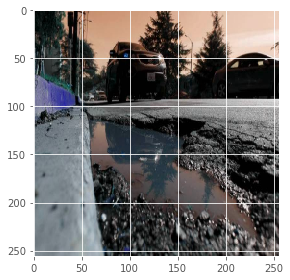

Predicted :  1  Actual :  1


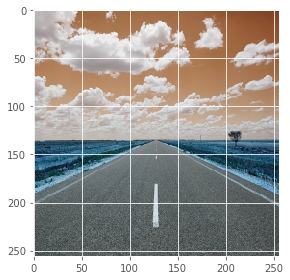

Predicted :  0  Actual :  0


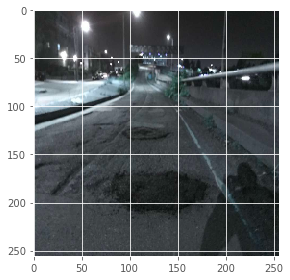

Predicted :  1  Actual :  1


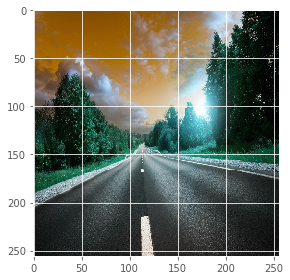

Predicted :  0  Actual :  0


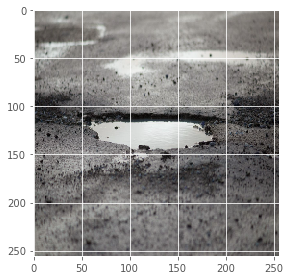

Predicted :  1  Actual :  1


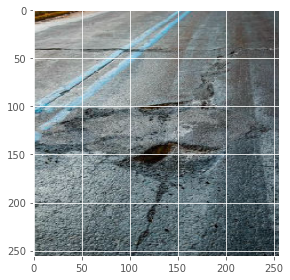

Predicted :  1  Actual :  1


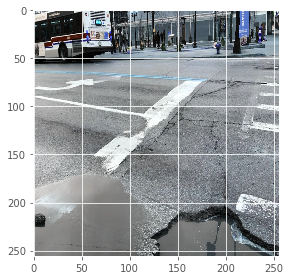

Predicted :  1  Actual :  1


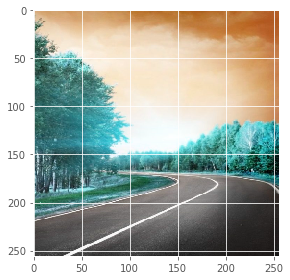

Predicted :  0  Actual :  0


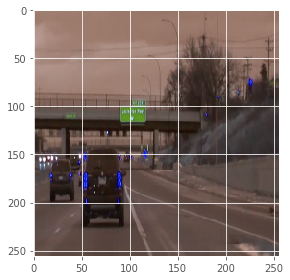

Predicted :  0  Actual :  0


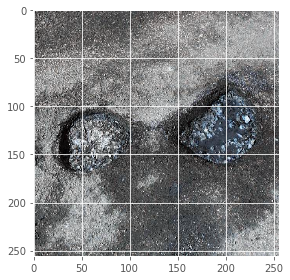

Predicted :  1  Actual :  1


In [30]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from skimage.io import imshow
import random
from keras.utils import normalize, to_categorical

#Fetching random images from the whole dataset
randomlist = random.sample(range(0, len(train_data)), 10)
X_test=list()
y_test=list()

for ix in randomlist:
  img = cv2.imread(train_data[ix])
  img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
  X_test.append(img)
  y_test.append(target_data[ix])

X_test=np.array(X_test)
y_test=np.array(y_test)

X_test_normalize = normalize(X_test,axis=1)
y_pred = loaded_model.predict(X_test_normalize)
y_pred=(y_pred>0.3)*1


for i in range(0,len(X_test)):
  imshow(X_test[i])
  plt.show()
  print("Predicted : ",y_pred[i][0]," Actual : ",y_test[i])
  
  #try:
  #  pred=y_pred[i].tolist().index(1)
  #  actual=y_test_categorical[i].tolist().index(1)
  #  print("Actual : "+label[actual]+" Predicted : "+label[pred])
  #except:
  #  pred="Threshold not met"
  #  actual=y_test_categorical[i].tolist().index(1)
  #  print("Actual : "+label[actual]+" Predicted : "+pred)

  

In [32]:
X_train_backup = normalize(X_train_backup,axis=1)
y_train_pred = loaded_model.predict(X_train_backup)
y_train_pred=(y_train_pred>0.3)*1

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy:', accuracy_score(y_train_backup, y_train_pred))
print('Precision:', precision_score(y_train_backup, y_train_pred,average='weighted'))
print('Recall:', recall_score(y_train_backup, y_train_pred,average='weighted'))
print('F1 score:', f1_score(y_train_backup, y_train_pred,average='weighted'))

Accuracy: 0.9944852941176471
Precision: 0.9944914613572702
Recall: 0.9944852941176471
F1 score: 0.9944850143830812


In [40]:
X_valid_backup = normalize(X_valid_backup,axis=1)
y_valid_pred = loaded_model.predict(X_valid_backup)
y_valid_pred=(y_valid_pred>0.3)*1

In [41]:
print('Accuracy:', accuracy_score(y_valid_backup, y_valid_pred))
print('Precision:', precision_score(y_valid_backup, y_valid_pred,average='weighted'))
print('Recall:', recall_score(y_valid_backup, y_valid_pred,average='weighted'))
print('F1 score:', f1_score(y_valid_backup, y_valid_pred,average='weighted'))

Accuracy: 0.8823529411764706
Precision: 0.8882615546218487
Recall: 0.8823529411764706
F1 score: 0.8835564232512736
